In [18]:
import numpy as np
import pandas as pd
import importlib
import os
import sys
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import importlib 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from scipy.stats import bernoulli, norm
from logistic_regression import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import utils 
import optimizers
from utils import *
from optimizers import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
importlib.reload(utils)
importlib.reload(optimizers)

<module 'optimizers' from 'c:\\Users\\user\\Documents\\GitHub\\Advanced-Machine-Learning\\project_1\\optimizers.py'>

# Load datasets and models

In [2]:
datasets = {}
datasets['covertype'] = pd.read_csv('data/covertype.csv') #load_covertype()
datasets['banana'] = load_banana()
datasets['magic_telescope'] = load_magic_telescope()
datasets['penguins'] = load_penguins_df()
datasets['sonar'] = load_sonar()
datasets['ionosphere'] = load_ionosphere()

datasets['breast_cancer'] = load_breast_cancer()
datasets['airline'] = load_airline()
datasets['pcos'] = load_pcos()



In [3]:
datasets['covertype'].to_csv('data/covertype.csv', index=False)

In [4]:
models = {}
models['SGD'] = LogisticRegression(optimizer = SGD())
models['SGD_INT'] = LogisticRegression(optimizer = SGD(), interactions = True)
models['IWLS'] = LogisticRegression(optimizer = IWLS())
models['IWLS_INT'] = LogisticRegression(optimizer = IWLS(), interactions = True)
models['Adam'] = LogisticRegression(optimizer = Adam())
models['Adam_INT'] = LogisticRegression(optimizer = Adam(), interactions = True)
models['LDA'] = LinearDiscriminantAnalysis()
models['QDA'] = QuadraticDiscriminantAnalysis()
models['RandomForest'] = RandomForestClassifier()
models['DecisionTree'] = DecisionTreeClassifier()

In [25]:
optimizers = ['Adam', 'Adam_INT', "SGD", 'SGD_INT', 'IWLS', 'IWLS_INT']
int_optimizers = ['Adam_INT', 'SGD_INT', 'IWLS_INT']
small_sets = ['magic_telescope', 'penguins', 'banana']

# Experiments

In [26]:
results = {}
num_of_experiments = 10
for dataset_name in datasets.keys():
    results[dataset_name] = {}
    df = datasets[dataset_name]
    if len(df)>1000:
        df = df.sample(n=1000)
    X = df.iloc[:,:-1]
    y= df.iloc[:, -1]
    for model_name in models.keys():
        results[dataset_name][model_name] = {}
        results[dataset_name][model_name]['score'] = []
        results[dataset_name][model_name]['n_of_iterations'] = []
        model = models[model_name]
        if model_name in int_optimizers and dataset_name not in small_sets:
            continue
        for _ in range(num_of_experiments):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
            scaler = StandardScaler()
            scaler.fit(X_train)
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)
            if model_name in optimizers:
                _, n_of_iterations = model.fit(X_train, y_train)
            else:
                model.fit(X_train, y_train)
                n_of_iterations = 0
            y_hat = model.predict(X_test)
            acc = balanced_accuracy_score(y_test, y_hat)
            results[dataset_name][model_name]['score'].append(acc)
            results[dataset_name][model_name]['n_of_iterations'].append(n_of_iterations)
        print(f'model: {model_name}, dataset: {dataset_name},  Mean accuracy {np.mean(results[dataset_name][model_name]["score"])}')
        



Model training:   0%|          | 0/500 [00:00<?, ?it/s]

Model training:  11%|█▏        | 57/500 [00:01<00:08, 49.82it/s]


Early stopping!


Model training:  13%|█▎        | 63/500 [00:00<00:06, 70.74it/s]


Early stopping!


Model training:  12%|█▏        | 58/500 [00:00<00:05, 75.64it/s]


Early stopping!


Model training:  17%|█▋        | 85/500 [00:01<00:05, 76.10it/s]


Early stopping!


Model training:  12%|█▏        | 59/500 [00:00<00:06, 70.78it/s]


Early stopping!


Model training:  13%|█▎        | 65/500 [00:00<00:05, 76.65it/s]


Early stopping!


Model training:  13%|█▎        | 66/500 [00:01<00:07, 54.58it/s]


Early stopping!


Model training:  12%|█▏        | 62/500 [00:01<00:07, 55.71it/s]


Early stopping!


Model training:  12%|█▏        | 62/500 [00:01<00:07, 55.85it/s]


Early stopping!


Model training:  13%|█▎        | 63/500 [00:00<00:06, 63.91it/s]


Early stopping!
model: SGD, dataset: covertype,  Mean accuracy 0.6077334229544951


Model training:   6%|▌         | 29/500 [00:00<00:07, 65.92it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 51/500 [00:00<00:06, 71.98it/s]


Early stopping!


Model training:   6%|▋         | 32/500 [00:00<00:07, 65.88it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:01<00:09, 46.95it/s]


Early stopping!


Model training:   6%|▌         | 28/500 [00:00<00:06, 69.72it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 51/500 [00:00<00:05, 75.89it/s]


Early stopping!


Model training:   6%|▌         | 28/500 [00:00<00:07, 62.86it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 51/500 [00:00<00:06, 70.54it/s]


Early stopping!


Model training:   6%|▌         | 28/500 [00:00<00:07, 66.54it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 51/500 [00:00<00:06, 70.14it/s]


Early stopping!


Model training:   6%|▌         | 30/500 [00:00<00:06, 70.81it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  17%|█▋        | 84/500 [00:00<00:04, 85.20it/s]


Early stopping!


Model training:   7%|▋         | 37/500 [00:00<00:06, 71.69it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:06, 70.53it/s]


Early stopping!


Model training:   6%|▌         | 28/500 [00:00<00:06, 68.91it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:01<00:09, 49.38it/s]


Early stopping!


Model training:   6%|▌         | 30/500 [00:00<00:09, 52.05it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 52/500 [00:00<00:07, 57.97it/s]


Early stopping!


Model training:   7%|▋         | 33/500 [00:00<00:07, 64.78it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:14: RuntimeWarning: overflow encountered in exp
  return -1*(y @ (coef @ X.T + intercept) - np.sum(np.log(1 + np.exp(-1*(coef @ X.T + intercept)))))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in log
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: overflow encountered in square
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
c:\Users\user\Documents\GitHub\Advanced-Machine

Early stopping!
model: IWLS, dataset: covertype,  Mean accuracy 0.6901821166098939


Model training:  47%|████▋     | 234/500 [00:00<00:00, 366.77it/s]


Early stopping!


Model training:  25%|██▍       | 124/500 [00:00<00:00, 376.85it/s]


Early stopping!


Model training:  47%|████▋     | 237/500 [00:00<00:00, 369.14it/s]


Early stopping!


Model training:  19%|█▉        | 94/500 [00:00<00:01, 352.03it/s]


Early stopping!


Model training:  10%|█         | 50/500 [00:00<00:01, 322.57it/s]

Early stopping!



Model training: 100%|██████████| 500/500 [00:01<00:00, 371.07it/s]


model: Adam, dataset: covertype,  Mean accuracy 0.6819468334007717
model: LDA, dataset: covertype,  Mean accuracy 0.686685937161821


c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\lib\site-package

model: QDA, dataset: covertype,  Mean accuracy 0.57936065680578
model: RandomForest, dataset: covertype,  Mean accuracy 0.7445984629213879
model: DecisionTree, dataset: covertype,  Mean accuracy 0.6422979845616065


Model training:  10%|█         | 50/500 [00:00<00:05, 76.69it/s]


Early stopping!


Model training:  10%|█         | 50/500 [00:00<00:05, 77.13it/s]


Early stopping!


Model training:  10%|█         | 50/500 [00:00<00:06, 75.00it/s]


Early stopping!


Model training:  10%|█         | 50/500 [00:00<00:05, 76.22it/s]


Early stopping!


Model training:  10%|█         | 50/500 [00:00<00:08, 56.19it/s]


Early stopping!


Model training:  10%|█         | 50/500 [00:00<00:06, 67.42it/s]


Early stopping!


Model training:  10%|█         | 50/500 [00:00<00:05, 76.56it/s]


Early stopping!


Model training:  11%|█         | 54/500 [00:00<00:06, 73.59it/s]


Early stopping!


Model training:  10%|█         | 50/500 [00:00<00:05, 76.77it/s]


Early stopping!


Model training:  10%|█         | 50/500 [00:00<00:06, 65.43it/s]


Early stopping!
model: SGD, dataset: banana,  Mean accuracy 0.7727458868719269


Model training:  13%|█▎        | 64/500 [00:01<00:07, 55.67it/s]


Early stopping!


Model training:  13%|█▎        | 65/500 [00:00<00:06, 71.83it/s]


Early stopping!


Model training:  13%|█▎        | 65/500 [00:00<00:05, 73.80it/s]


Early stopping!


Model training:  13%|█▎        | 66/500 [00:00<00:06, 66.82it/s]


Early stopping!


Model training:  12%|█▏        | 60/500 [00:00<00:06, 71.81it/s]


Early stopping!


Model training:  13%|█▎        | 66/500 [00:01<00:07, 57.73it/s]


Early stopping!


Model training:  23%|██▎       | 114/500 [00:01<00:05, 73.20it/s]


Early stopping!


Model training:  13%|█▎        | 66/500 [00:00<00:06, 71.18it/s]


Early stopping!


Model training:  11%|█         | 54/500 [00:00<00:07, 57.76it/s]


Early stopping!


Model training:  11%|█         | 56/500 [00:01<00:10, 41.26it/s]


Early stopping!
model: SGD_INT, dataset: banana,  Mean accuracy 0.8963592176267813


Model training:   2%|▏         | 9/500 [00:00<00:05, 85.71it/s]

Convergence detected

Model training:   3%|▎         | 14/500 [00:00<00:05, 83.33it/s]


Model training:   3%|▎         | 14/500 [00:00<00:20, 23.81it/s]


Convergence detected


Model training:   3%|▎         | 14/500 [00:00<00:06, 77.34it/s]


Convergence detected


Model training:   2%|▏         | 9/500 [00:00<00:05, 84.91it/s]

Convergence detected

Model training:   3%|▎         | 14/500 [00:00<00:05, 82.36it/s]


Model training:   3%|▎         | 14/500 [00:00<00:06, 72.54it/s]


Convergence detected


Model training:   3%|▎         | 14/500 [00:00<00:06, 71.43it/s]


Convergence detected


Model training:   2%|▏         | 8/500 [00:00<00:06, 78.43it/s]

Convergence detected

Model training:   3%|▎         | 14/500 [00:00<00:06, 80.00it/s]


Model training:   3%|▎         | 14/500 [00:00<00:07, 68.29it/s]


Convergence detected


Model training:   2%|▏         | 8/500 [00:00<00:06, 79.18it/s]

Convergence detected

Model training:   3%|▎         | 14/500 [00:00<00:05, 81.62it/s]


Model training:   3%|▎         | 14/500 [00:00<00:07, 68.29it/s]


Convergence detected
model: IWLS, dataset: banana,  Mean accuracy 0.8511731556100977


Model training:   3%|▎         | 17/500 [00:00<00:15, 32.14it/s]


Convergence detected


Model training:   3%|▎         | 16/500 [00:00<00:06, 71.06it/s]


Convergence detected


Model training:   3%|▎         | 16/500 [00:00<00:06, 70.80it/s]


Convergence detected


Model training:   3%|▎         | 16/500 [00:00<00:07, 62.99it/s]


Convergence detected


Model training:   3%|▎         | 16/500 [00:00<00:06, 71.58it/s]


Convergence detected


Model training:   3%|▎         | 16/500 [00:00<00:06, 72.07it/s]


Convergence detected


Model training:   3%|▎         | 16/500 [00:00<00:07, 64.37it/s]


Convergence detected


Model training:   3%|▎         | 16/500 [00:00<00:08, 54.05it/s]


Convergence detected


Model training:   3%|▎         | 17/500 [00:00<00:06, 71.87it/s]


Convergence detected


Model training:   3%|▎         | 17/500 [00:00<00:14, 32.57it/s]


Convergence detected
model: IWLS_INT, dataset: banana,  Mean accuracy 0.92976566862744


Model training:  10%|█         | 50/500 [00:00<00:01, 403.66it/s]


Early stopping!


Model training:  10%|█         | 50/500 [00:00<00:01, 400.01it/s]


Early stopping!


Model training: 100%|██████████| 500/500 [00:01<00:00, 449.69it/s]


model: Adam, dataset: banana,  Mean accuracy 0.8554907679580367


Model training:  53%|█████▎    | 263/500 [00:00<00:00, 344.94it/s]


Early stopping!


Model training:  65%|██████▍   | 324/500 [00:01<00:00, 311.27it/s]


Early stopping!


Model training:  92%|█████████▏| 459/500 [00:01<00:00, 303.43it/s]


Early stopping!


Model training: 100%|██████████| 500/500 [00:01<00:00, 374.98it/s]


model: Adam_INT, dataset: banana,  Mean accuracy 0.9331246379460756
model: LDA, dataset: banana,  Mean accuracy 0.8570695634187088
model: QDA, dataset: banana,  Mean accuracy 0.9118431356846047
model: RandomForest, dataset: banana,  Mean accuracy 0.9445105685365502
model: DecisionTree, dataset: banana,  Mean accuracy 0.8786841227271129


Model training:  18%|█▊        | 88/500 [00:01<00:05, 75.56it/s]


Early stopping!


Model training:  18%|█▊        | 92/500 [00:01<00:05, 76.78it/s]


Early stopping!


Model training:  69%|██████▉   | 347/500 [00:04<00:02, 74.21it/s]


Early stopping!


Model training:  18%|█▊        | 92/500 [00:01<00:05, 71.71it/s]


Early stopping!


Model training:  19%|█▉        | 95/500 [00:01<00:06, 65.02it/s]


Early stopping!


Model training:  12%|█▏        | 58/500 [00:00<00:06, 68.06it/s]


Early stopping!


Model training:  11%|█         | 56/500 [00:00<00:07, 62.78it/s]


Early stopping!


Model training:  21%|██        | 105/500 [00:01<00:07, 52.96it/s]


Early stopping!


Model training:  22%|██▏       | 108/500 [00:01<00:05, 76.04it/s]


Early stopping!


Model training:  18%|█▊        | 90/500 [00:01<00:06, 61.45it/s]


Early stopping!
model: SGD, dataset: magic_telescope,  Mean accuracy 0.7190375120066801


Model training:  17%|█▋        | 87/500 [00:01<00:05, 75.07it/s]


Early stopping!


Model training:  17%|█▋        | 86/500 [00:01<00:05, 74.14it/s]


Early stopping!


Model training:  12%|█▏        | 59/500 [00:00<00:06, 67.89it/s]


Early stopping!


Model training:  15%|█▌        | 76/500 [00:01<00:06, 66.09it/s]


Early stopping!


Model training:  19%|█▉        | 94/500 [00:01<00:06, 61.34it/s]


Early stopping!


Model training:  17%|█▋        | 84/500 [00:01<00:06, 68.47it/s]


Early stopping!


Model training:  30%|███       | 151/500 [00:02<00:04, 74.89it/s]


Early stopping!


Model training:  17%|█▋        | 84/500 [00:01<00:05, 73.63it/s]


Early stopping!


Model training:  15%|█▍        | 73/500 [00:01<00:07, 56.28it/s]


Early stopping!


Model training:  15%|█▌        | 77/500 [00:01<00:06, 68.54it/s]


Early stopping!
model: SGD_INT, dataset: magic_telescope,  Mean accuracy 0.7225467076513057


Model training:   3%|▎         | 14/500 [00:00<00:04, 97.90it/s] 


Convergence detected


Model training:   3%|▎         | 14/500 [00:00<00:05, 93.34it/s]


Convergence detected


Model training:   3%|▎         | 14/500 [00:00<00:05, 85.89it/s]


Convergence detected


Model training:   3%|▎         | 14/500 [00:00<00:05, 86.42it/s]

Convergence detected



Model training:   1%|▏         | 7/500 [00:00<00:07, 64.81it/s]

Convergence detected

Model training:   3%|▎         | 14/500 [00:00<00:06, 77.35it/s]


Model training:   3%|▎         | 14/500 [00:00<00:05, 88.05it/s]

Convergence detected



Model training:   3%|▎         | 14/500 [00:00<00:17, 27.78it/s]


Convergence detected


Model training:   3%|▎         | 14/500 [00:00<00:04, 97.22it/s] 


Convergence detected


Model training:   2%|▏         | 8/500 [00:00<00:07, 69.12it/s]

Convergence detected

Model training:   3%|▎         | 14/500 [00:00<00:06, 75.38it/s]


Model training:   2%|▏         | 9/500 [00:00<00:05, 84.11it/s]

Convergence detected


Model training:   3%|▎         | 14/500 [00:00<00:06, 76.50it/s]


model: IWLS, dataset: magic_telescope,  Mean accuracy 0.7402463330682675


Model training:   4%|▎         | 18/500 [00:00<00:06, 71.71it/s]


Convergence detected


Model training:   4%|▍         | 19/500 [00:00<00:05, 93.60it/s]


Convergence detected


Model training:   4%|▍         | 19/500 [00:00<00:06, 72.19it/s]


Convergence detected


Model training:   4%|▍         | 19/500 [00:00<00:05, 91.35it/s]


Convergence detected


Model training:   4%|▍         | 19/500 [00:00<00:05, 81.20it/s]


Convergence detected


Model training:   4%|▍         | 19/500 [00:00<00:14, 33.48it/s]


Convergence detected


Model training:   4%|▍         | 19/500 [00:00<00:05, 95.96it/s]


Convergence detected


Model training:   4%|▍         | 19/500 [00:00<00:05, 88.37it/s]


Convergence detected


Model training:   4%|▍         | 19/500 [00:00<00:05, 86.37it/s]


Convergence detected


Model training:   4%|▍         | 19/500 [00:00<00:05, 84.92it/s]


Convergence detected
model: IWLS_INT, dataset: magic_telescope,  Mean accuracy 0.7558372746647819


Model training: 100%|██████████| 500/500 [00:01<00:00, 357.88it/s]


model: Adam, dataset: magic_telescope,  Mean accuracy 0.7067293459684042


Model training: 100%|██████████| 500/500 [00:01<00:00, 376.80it/s]


model: Adam_INT, dataset: magic_telescope,  Mean accuracy 0.7019265445921303
model: LDA, dataset: magic_telescope,  Mean accuracy 0.7051050329142218
model: QDA, dataset: magic_telescope,  Mean accuracy 0.7317827433612349
model: RandomForest, dataset: magic_telescope,  Mean accuracy 0.7635290162464881
model: DecisionTree, dataset: magic_telescope,  Mean accuracy 0.7315445034792218


Model training:  10%|█         | 50/500 [00:00<00:03, 131.93it/s]


Early stopping!


Model training:  11%|█         | 55/500 [00:00<00:03, 124.01it/s]


Early stopping!


Model training:  11%|█         | 53/500 [00:00<00:06, 73.91it/s] 


Early stopping!


Model training:  11%|█         | 54/500 [00:00<00:03, 133.99it/s]


Early stopping!


Model training:  11%|█         | 55/500 [00:00<00:04, 103.19it/s]


Early stopping!


Model training:  11%|█         | 53/500 [00:00<00:03, 117.38it/s]


Early stopping!


Model training:  11%|█         | 55/500 [00:00<00:03, 144.53it/s]


Early stopping!


Model training:  15%|█▍        | 73/500 [00:00<00:03, 132.96it/s]


Early stopping!


Model training:  13%|█▎        | 66/500 [00:00<00:02, 152.78it/s]


Early stopping!


Model training:  11%|█         | 54/500 [00:00<00:06, 65.33it/s]


Early stopping!
model: SGD, dataset: penguins,  Mean accuracy 0.8876099190688856


Model training:  11%|█         | 53/500 [00:00<00:05, 86.91it/s] 


Early stopping!


Model training:  10%|█         | 52/500 [00:00<00:02, 177.88it/s]


Early stopping!


Model training:  12%|█▏        | 62/500 [00:00<00:05, 83.56it/s] 


Early stopping!


Model training:  12%|█▏        | 58/500 [00:00<00:03, 147.21it/s]


Early stopping!


Model training:  40%|████      | 202/500 [00:01<00:02, 142.79it/s]


Early stopping!


Model training:  10%|█         | 50/500 [00:00<00:03, 113.70it/s]


Early stopping!


Model training:  11%|█         | 55/500 [00:00<00:03, 131.58it/s]


Early stopping!


Model training:  10%|█         | 52/500 [00:00<00:05, 89.16it/s] 


Early stopping!
model: SGD_INT, dataset: penguins,  Mean accuracy 0.9212738619966997


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:14: RuntimeWarning: overflow encountered in exp
  return -1*(y @ (coef @ X.T + intercept) - np.sum(np.log(1 + np.exp(-1*(coef @ X.T + intercept)))))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in log
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00

Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: overflow encountered in square
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  11%|█         | 55/500 [00:00<00:05, 87.07it/s] 


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  11%|█         | 54/500 [00:00<00:01, 296.70it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:14: RuntimeWarning: overflow encountered in exp
  return -1*(y @ (coef @ X.T + intercept) - np.sum(np.log(1 + np.exp(-1*(coef @ X.T + intercept)))))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in log
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: overflow encountered in square
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning

Early stopping!

Model training:  10%|█         | 51/500 [00:00<00:01, 269.86it/s]


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:14: RuntimeWarning: overflow encountered in exp
  return -1*(y @ (coef @ X.T + intercept) - np.sum(np.log(1 + np.exp(-1*(coef @ X.T + intercept)))))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in log
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: overflow encountered in square
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning

Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:02, 179.21it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:03, 143.68it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:14: RuntimeWarning: overflow encountered in exp
  return -1*(y @ (coef @ X.T + intercept) - np.sum(np.log(1 + np.exp(-1*(coef @ X.T + intercept)))))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in log
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00

Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:06, 69.29it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  12%|█▏        | 58/500 [00:00<00:03, 119.59it/s]


Early stopping!
model: IWLS, dataset: penguins,  Mean accuracy 0.944470483065021


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: overflow encountered in square
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:02, 169.49it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:14: RuntimeWarning: overflow encountered in exp
  return -1*(y @ (coef @ X.T + intercept) - np.sum(np.log(1 + np.exp(-1*(coef @ X.T + intercept)))))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in log
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: overflow encountered in square
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning

Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:14: RuntimeWarning: overflow encountered in exp
  return -1*(y @ (coef @ X.T + intercept) - np.sum(np.log(1 + np.exp(-1*(coef @ X.T + intercept)))))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in log
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: overflow encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: Runt

Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:14: RuntimeWarning: overflow encountered in exp
  return -1*(y @ (coef @ X.T + intercept) - np.sum(np.log(1 + np.exp(-1*(coef @ X.T + intercept)))))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:02, 175.01it/s]


Early stopping!


Model training:   0%|          | 1/500 [00:00<02:25,  3.42it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:14: RuntimeWarning: overflow encountered in exp
  return -1*(y @ (coef @ X.T + intercept) - np.sum(np.log(1 + np.exp(-1*(coef @ X.T + intercept)))))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in log
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: overflow encountered in square
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
c:\Users\user\Documents\GitHub\Advanced-Machine-

Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 51/500 [00:00<00:02, 180.21it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:14: RuntimeWarning: overflow encountered in exp
  return -1*(y @ (coef @ X.T + intercept) - np.sum(np.log(1 + np.exp(-1*(coef @ X.T + intercept)))))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in log
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: overflow encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: Runt

Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 51/500 [00:00<00:02, 156.92it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:14: RuntimeWarning: overflow encountered in exp
  return -1*(y @ (coef @ X.T + intercept) - np.sum(np.log(1 + np.exp(-1*(coef @ X.T + intercept)))))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in log
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: overflow encountered in square
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning

Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:14: RuntimeWarning: overflow encountered in exp
  return -1*(y @ (coef @ X.T + intercept) - np.sum(np.log(1 + np.exp(-1*(coef @ X.T + intercept)))))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:03, 142.75it/s]


Early stopping!
model: IWLS_INT, dataset: penguins,  Mean accuracy 0.5993206651075446


Model training:  44%|████▍     | 222/500 [00:00<00:00, 410.82it/s]


Early stopping!


Model training:  33%|███▎      | 167/500 [00:00<00:00, 345.04it/s]


Early stopping!


Model training:  46%|████▌     | 231/500 [00:00<00:00, 524.99it/s]


Early stopping!


Model training:  78%|███████▊  | 392/500 [00:00<00:00, 664.20it/s]


Early stopping!


Model training:  28%|██▊       | 142/500 [00:00<00:00, 498.25it/s]


Early stopping!


Model training:  96%|█████████▌| 480/500 [00:00<00:00, 649.52it/s]


Early stopping!


Model training:  49%|████▉     | 246/500 [00:00<00:00, 345.74it/s]


Early stopping!


Model training:  85%|████████▌ | 425/500 [00:00<00:00, 977.01it/s] 


Early stopping!


Model training: 100%|██████████| 500/500 [00:00<00:00, 621.14it/s]


model: Adam, dataset: penguins,  Mean accuracy 0.9862658061398237


Model training:  33%|███▎      | 163/500 [00:00<00:00, 537.92it/s]


Early stopping!


Model training:  40%|████      | 200/500 [00:00<00:00, 944.85it/s]


Early stopping!


Model training:  82%|████████▏ | 411/500 [00:00<00:00, 942.67it/s]


Early stopping!


Model training:  34%|███▍      | 170/500 [00:00<00:00, 894.18it/s]


Early stopping!


Model training:  54%|█████▍    | 272/500 [00:00<00:00, 836.78it/s]


Early stopping!


Model training:  28%|██▊       | 140/500 [00:00<00:01, 355.36it/s]


Early stopping!


Model training:  44%|████▍     | 221/500 [00:00<00:00, 393.56it/s]


Early stopping!


Model training:  50%|████▉     | 248/500 [00:00<00:00, 414.03it/s]
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn(

Early stopping!
model: Adam_INT, dataset: penguins,  Mean accuracy 0.9921396648597073
model: LDA, dataset: penguins,  Mean accuracy 1.0


c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


model: QDA, dataset: penguins,  Mean accuracy 0.8232333522993194
model: RandomForest, dataset: penguins,  Mean accuracy 1.0
model: DecisionTree, dataset: penguins,  Mean accuracy 0.9976136363636364


Model training:  26%|██▌       | 131/500 [00:00<00:01, 226.25it/s]


Early stopping!


Model training:  16%|█▌        | 81/500 [00:00<00:02, 202.49it/s]


Early stopping!


Model training:  15%|█▍        | 73/500 [00:00<00:02, 197.29it/s]


Early stopping!


Model training:  26%|██▌       | 131/500 [00:00<00:01, 241.50it/s]


Early stopping!


Model training:  28%|██▊       | 140/500 [00:00<00:01, 237.28it/s]


Early stopping!


Model training:  77%|███████▋  | 385/500 [00:01<00:00, 232.64it/s]


Early stopping!


Model training:  19%|█▉        | 97/500 [00:00<00:01, 212.26it/s]


Early stopping!


Model training:  12%|█▏        | 62/500 [00:00<00:01, 230.48it/s]


Early stopping!


Model training:  12%|█▏        | 62/500 [00:00<00:02, 189.87it/s]


Early stopping!


Model training:  33%|███▎      | 165/500 [00:00<00:01, 250.64it/s]


Early stopping!
model: SGD, dataset: sonar,  Mean accuracy 0.7138871912401324


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 51/500 [00:00<00:01, 270.27it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:01, 267.38it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  11%|█         | 54/500 [00:00<00:04, 96.09it/s] 


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  11%|█         | 54/500 [00:00<00:01, 235.81it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:01, 250.00it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:   4%|▍         | 22/500 [00:00<00:02, 215.61it/s]

Early stopping!

Model training:  10%|█         | 50/500 [00:00<00:01, 279.27it/s]


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:01, 248.76it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  11%|█         | 54/500 [00:00<00:01, 288.78it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:02, 205.75it/s]


Early stopping!


Model training:   0%|          | 1/500 [00:00<01:03,  7.87it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  11%|█         | 54/500 [00:00<00:02, 178.22it/s]


Early stopping!
model: IWLS, dataset: sonar,  Mean accuracy 0.7188262047786547


Model training:  20%|██        | 100/500 [00:00<00:00, 729.95it/s]


Early stopping!


Model training: 100%|██████████| 500/500 [00:00<00:00, 1099.42it/s]


model: Adam, dataset: sonar,  Mean accuracy 0.7609250834035809
model: LDA, dataset: sonar,  Mean accuracy 0.7526199927523456
model: QDA, dataset: sonar,  Mean accuracy 0.7173221328054246
model: RandomForest, dataset: sonar,  Mean accuracy 0.7975906517335882
model: DecisionTree, dataset: sonar,  Mean accuracy 0.7429399385363344


Model training:  50%|████▉     | 248/500 [00:01<00:01, 193.57it/s]


Early stopping!


Model training:  36%|███▌      | 178/500 [00:00<00:01, 179.61it/s]


Early stopping!


Model training:  15%|█▍        | 73/500 [00:00<00:04, 102.43it/s]


Early stopping!


Model training:  89%|████████▊ | 443/500 [00:02<00:00, 189.76it/s]


Early stopping!


Model training:  17%|█▋        | 83/500 [00:00<00:02, 171.49it/s]


Early stopping!


Model training:  32%|███▏      | 160/500 [00:01<00:02, 147.05it/s]


Early stopping!


Model training:  38%|███▊      | 191/500 [00:01<00:01, 179.99it/s]


Early stopping!


Model training:  11%|█         | 55/500 [00:00<00:02, 149.46it/s]


Early stopping!
model: SGD, dataset: ionosphere,  Mean accuracy 0.8378653596315143


Model training:   7%|▋         | 34/500 [00:00<00:02, 168.14it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:02, 191.57it/s]


Early stopping!


Model training:   4%|▍         | 21/500 [00:00<00:02, 207.92it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  18%|█▊        | 88/500 [00:00<00:01, 242.42it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:   5%|▍         | 23/500 [00:00<00:02, 225.49it/s]

Early stopping!

Model training:  10%|█         | 50/500 [00:00<00:01, 259.07it/s]


Model training:   2%|▏         | 8/500 [00:00<00:06, 80.00it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:02, 181.82it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:05, 79.84it/s] 


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:02, 188.68it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  11%|█         | 56/500 [00:00<00:02, 169.15it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  11%|█         | 53/500 [00:00<00:02, 191.32it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 51/500 [00:00<00:02, 187.50it/s]


Early stopping!


Model training:   1%|          | 4/500 [00:00<00:13, 38.10it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 52/500 [00:00<00:02, 166.14it/s]


Early stopping!
model: IWLS, dataset: ionosphere,  Mean accuracy 0.819430798894525


Model training: 100%|██████████| 500/500 [00:00<00:00, 870.22it/s]
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn(

model: Adam, dataset: ionosphere,  Mean accuracy 0.8514951418080121
model: LDA, dataset: ionosphere,  Mean accuracy 0.829551938463158


c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


model: QDA, dataset: ionosphere,  Mean accuracy 0.8782180380635441
model: RandomForest, dataset: ionosphere,  Mean accuracy 0.9311828706596772
model: DecisionTree, dataset: ionosphere,  Mean accuracy 0.8687842585704878


Model training:  12%|█▏        | 59/500 [00:00<00:04, 100.98it/s]


Early stopping!


Model training:  12%|█▏        | 60/500 [00:00<00:04, 99.47it/s] 


Early stopping!


Model training:  12%|█▏        | 61/500 [00:01<00:08, 49.80it/s]


Early stopping!


Model training:  11%|█▏        | 57/500 [00:00<00:05, 74.32it/s]


Early stopping!


Model training:  14%|█▍        | 71/500 [00:00<00:05, 72.03it/s]


Early stopping!


Model training:  13%|█▎        | 63/500 [00:00<00:06, 64.78it/s]


Early stopping!


Model training:  14%|█▍        | 69/500 [00:00<00:05, 80.05it/s]


Early stopping!


Model training:  13%|█▎        | 63/500 [00:00<00:06, 70.79it/s]


Early stopping!


Model training:  13%|█▎        | 67/500 [00:01<00:06, 65.65it/s]


Early stopping!


Model training:  14%|█▎        | 68/500 [00:00<00:04, 105.26it/s]


Early stopping!
model: SGD, dataset: breast_cancer,  Mean accuracy 0.9278470513048619


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:03, 117.92it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:06, 71.26it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  11%|█         | 55/500 [00:00<00:03, 126.85it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  11%|█         | 55/500 [00:00<00:03, 138.36it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  11%|█         | 55/500 [00:00<00:03, 131.89it/s]


Early stopping!


Model training:   1%|          | 6/500 [00:00<00:08, 58.82it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:03, 118.26it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  11%|█         | 55/500 [00:00<00:03, 121.68it/s]


Early stopping!


Model training:   0%|          | 2/500 [00:00<00:31, 15.62it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:04, 111.86it/s]


Early stopping!


Model training:   1%|          | 6/500 [00:00<00:17, 28.17it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:06, 73.53it/s]


Early stopping!


Model training:   1%|          | 6/500 [00:00<00:08, 57.69it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  11%|█         | 55/500 [00:00<00:03, 113.68it/s]


Early stopping!
model: IWLS, dataset: breast_cancer,  Mean accuracy 0.9547667878804529


Model training:  53%|█████▎    | 266/500 [00:00<00:00, 426.95it/s]


Early stopping!


Model training:  35%|███▌      | 176/500 [00:00<00:00, 438.91it/s]


Early stopping!


Model training:  45%|████▌     | 225/500 [00:00<00:00, 474.65it/s]


Early stopping!


Model training:  36%|███▌      | 181/500 [00:00<00:00, 451.19it/s]


Early stopping!


Model training:  28%|██▊       | 142/500 [00:00<00:00, 378.63it/s]


Early stopping!


Model training:  34%|███▍      | 172/500 [00:00<00:00, 395.53it/s]


Early stopping!


Model training: 100%|██████████| 500/500 [00:00<00:00, 526.53it/s]


model: Adam, dataset: breast_cancer,  Mean accuracy 0.9589867645298866
model: LDA, dataset: breast_cancer,  Mean accuracy 0.9505769446430323
model: QDA, dataset: breast_cancer,  Mean accuracy 0.9626364328014946
model: RandomForest, dataset: breast_cancer,  Mean accuracy 0.9433387845815361
model: DecisionTree, dataset: breast_cancer,  Mean accuracy 0.928659702017851


Model training:  10%|█         | 50/500 [00:00<00:05, 76.44it/s]


Early stopping!


Model training:  11%|█         | 53/500 [00:00<00:05, 78.65it/s]


Early stopping!


Model training:  11%|█         | 54/500 [00:00<00:05, 77.08it/s]


Early stopping!


Model training:  11%|█         | 55/500 [00:00<00:05, 77.80it/s]


Early stopping!


Model training:  11%|█         | 54/500 [00:00<00:05, 74.48it/s]


Early stopping!


Model training:  15%|█▌        | 75/500 [00:00<00:05, 79.51it/s]


Early stopping!


Model training:  10%|█         | 51/500 [00:00<00:08, 53.54it/s]


Early stopping!


Model training:  13%|█▎        | 66/500 [00:00<00:05, 80.52it/s]


Early stopping!


Model training:  12%|█▏        | 61/500 [00:00<00:05, 81.31it/s]


Early stopping!


Model training:  11%|█         | 55/500 [00:00<00:05, 79.56it/s]


Early stopping!
model: SGD, dataset: airline,  Mean accuracy 0.7788071217046797


Model training:   3%|▎         | 14/500 [00:00<00:03, 121.73it/s]


Convergence detected


Model training:   3%|▎         | 14/500 [00:00<00:04, 119.66it/s]


Convergence detected


Model training:   3%|▎         | 14/500 [00:00<00:05, 95.89it/s]


Convergence detected


Model training:   3%|▎         | 14/500 [00:00<00:04, 112.00it/s]


Convergence detected


Model training:   3%|▎         | 14/500 [00:00<00:04, 120.70it/s]


Convergence detected


Model training:   3%|▎         | 14/500 [00:00<00:04, 99.28it/s] 


Convergence detected


Model training:   3%|▎         | 14/500 [00:00<00:04, 118.91it/s]


Convergence detected


Model training:   3%|▎         | 14/500 [00:00<00:04, 117.65it/s]


Convergence detected


Model training:   3%|▎         | 14/500 [00:00<00:04, 112.91it/s]


Convergence detected


Model training:   3%|▎         | 14/500 [00:00<00:04, 97.91it/s]


Convergence detected
model: IWLS, dataset: airline,  Mean accuracy 0.8809107970782021


Model training:  28%|██▊       | 140/500 [00:00<00:00, 406.94it/s]


Early stopping!


Model training:  28%|██▊       | 141/500 [00:00<00:01, 324.89it/s]


Early stopping!


Model training:  19%|█▉        | 94/500 [00:00<00:01, 300.32it/s]


Early stopping!


Model training:  53%|█████▎    | 265/500 [00:01<00:00, 248.49it/s]


Early stopping!


Model training:  25%|██▌       | 125/500 [00:00<00:01, 322.17it/s]


Early stopping!


Model training:  40%|████      | 200/500 [00:00<00:00, 303.10it/s]


Early stopping!


Model training:  33%|███▎      | 163/500 [00:00<00:01, 326.79it/s]


Early stopping!


Model training:  52%|█████▏    | 262/500 [00:00<00:00, 345.65it/s]


Early stopping!


Model training: 100%|██████████| 500/500 [00:01<00:00, 408.39it/s]


model: Adam, dataset: airline,  Mean accuracy 0.8266150950384643
model: LDA, dataset: airline,  Mean accuracy 0.8569668189942498
model: QDA, dataset: airline,  Mean accuracy 0.8407368514194603
model: RandomForest, dataset: airline,  Mean accuracy 0.9010511932787717
model: DecisionTree, dataset: airline,  Mean accuracy 0.8899159435983777


Model training:  10%|█         | 51/500 [00:00<00:03, 133.67it/s]


Early stopping!


Model training:  10%|█         | 50/500 [00:00<00:03, 115.47it/s]


Early stopping!


Model training:  10%|█         | 50/500 [00:00<00:03, 137.49it/s]


Early stopping!


Model training:  10%|█         | 50/500 [00:00<00:03, 135.10it/s]


Early stopping!


Model training:  10%|█         | 50/500 [00:00<00:03, 130.85it/s]


Early stopping!


Model training:  10%|█         | 50/500 [00:00<00:03, 132.18it/s]


Early stopping!


Model training:  10%|█         | 50/500 [00:00<00:03, 140.18it/s]


Early stopping!


Model training:  11%|█         | 54/500 [00:00<00:03, 121.78it/s]


Early stopping!


Model training:  11%|█         | 56/500 [00:00<00:03, 137.98it/s]


Early stopping!


Model training:  10%|█         | 50/500 [00:00<00:05, 81.82it/s] 


Early stopping!
model: SGD, dataset: pcos,  Mean accuracy 0.7720406027561606


Model training:   3%|▎         | 16/500 [00:00<00:02, 235.29it/s]


Convergence detected


Model training:   3%|▎         | 17/500 [00:00<00:02, 232.89it/s]


Convergence detected


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:   5%|▌         | 27/500 [00:00<00:01, 262.15it/s]

Early stopping!

Model training:  10%|█         | 50/500 [00:00<00:01, 277.79it/s]


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:  10%|█         | 50/500 [00:00<00:01, 251.26it/s]


Early stopping!


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:   6%|▌         | 29/500 [00:00<00:01, 288.11it/s]

Early stopping!

Model training:  10%|█         | 50/500 [00:00<00:01, 291.12it/s]


Model training:   4%|▎         | 18/500 [00:00<00:02, 211.77it/s]


Convergence detected


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(a/(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(a*(1-a))
c:\Users\user\Documents\GitHub\Advanced-Machine-Learning\project_1\optimizers.py:116: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training:   4%|▍         | 22/500 [00:00<00:02, 217.83it/s]

Early stopping!

Model training:  10%|█         | 50/500 [00:00<00:01, 256.42it/s]


Model training:   4%|▎         | 18/500 [00:00<00:02, 219.52it/s]


Convergence detected


Model training:   0%|          | 0/500 [00:00<?, ?it/s]

Convergence detected

Model training:   4%|▎         | 18/500 [00:00<00:02, 236.86it/s]


Model training:   3%|▎         | 17/500 [00:00<00:02, 238.88it/s]


Convergence detected
model: IWLS, dataset: pcos,  Mean accuracy 0.851857766522552


Model training:  22%|██▏       | 110/500 [00:00<00:01, 242.83it/s]


Early stopping!


Model training:  44%|████▍     | 219/500 [00:00<00:00, 498.83it/s]


Early stopping!


Model training:  42%|████▏     | 208/500 [00:00<00:00, 529.07it/s]


Early stopping!


Model training:  30%|███       | 152/500 [00:00<00:00, 423.73it/s]


Early stopping!


Model training:  34%|███▍      | 171/500 [00:00<00:00, 496.55it/s]


Early stopping!


Model training:  43%|████▎     | 213/500 [00:00<00:00, 490.76it/s]


Early stopping!


Model training:  29%|██▉       | 147/500 [00:00<00:00, 404.96it/s]


Early stopping!


Model training:  22%|██▏       | 110/500 [00:00<00:00, 410.45it/s]


Early stopping!


Model training:  38%|███▊      | 192/500 [00:00<00:00, 472.73it/s]


Early stopping!


Model training:  45%|████▌     | 225/500 [00:00<00:00, 470.89it/s]


Early stopping!
model: Adam, dataset: pcos,  Mean accuracy 0.8227491816827099
model: LDA, dataset: pcos,  Mean accuracy 0.8872082118860029
model: QDA, dataset: pcos,  Mean accuracy 0.7850398847457633
model: RandomForest, dataset: pcos,  Mean accuracy 0.8756436672855921
model: DecisionTree, dataset: pcos,  Mean accuracy 0.8069512313345385


In [27]:
import json
with open('results.json', 'w') as fp:
    json.dump(results, fp)

## Average accuracy and n_of_iterations

In [39]:
index_datasets = ['banana', 'magic_telescope', 'penguins', 'sonar', 'ionosphere', 'breast_cancer', 'airline', 'covertype', 'pcos']
col_models = ['SGD', 'IWLS', 'Adam', 'LDA', 'QDA', 'RandomForest', 'DecisionTree']
avg_df = pd.DataFrame(columns = col_models, index=index_datasets)
for ind in index_datasets:
    for col in col_models:
        avg = np.mean(results[ind][col]['score'])
        avg_df.loc[ind, col] = avg

avg_df.loc['mean'] = avg_df.mean()


avg_df['mean'] = avg_df.mean(axis=1)
pd.options.display.float_format = '{:,.2f}'.format
avg_df

,SGD,IWLS,Adam,LDA,QDA,RandomForest,DecisionTree,mean
banana,0.77,0.85,0.86,0.86,0.91,0.94,0.88,0.87
magic_telescope,0.72,0.74,0.71,0.71,0.73,0.76,0.73,0.73
penguins,0.89,0.94,0.99,1.00,0.82,1.00,1.00,0.95
sonar,0.71,0.72,0.76,0.75,0.72,0.80,0.74,0.74
ionosphere,0.84,0.82,0.85,0.83,0.88,0.93,0.87,0.86
breast_cancer,0.93,0.95,0.96,0.95,0.96,0.94,0.93,0.95
airline,0.78,0.88,0.83,0.86,0.84,0.90,0.89,0.85
covertype,0.61,0.69,0.68,0.69,0.58,0.74,0.64,0.66
pcos,0.77,0.85,0.82,0.89,0.79,0.88,0.81,0.83
mean,0.78,0.83,0.83,0.84,0.80,0.88,0.83,0.83


In [40]:
avg_df.to_latex()

'\\begin{tabular}{llllllllr}\n\\toprule\n{} &  SGD & IWLS & Adam &  LDA &  QDA & RandomForest & DecisionTree &  mean \\\\\n\\midrule\nbanana          & 0.77 & 0.85 & 0.86 & 0.86 & 0.91 &         0.94 &         0.88 &  0.87 \\\\\nmagic\\_telescope & 0.72 & 0.74 & 0.71 & 0.71 & 0.73 &         0.76 &         0.73 &  0.73 \\\\\npenguins        & 0.89 & 0.94 & 0.99 & 1.00 & 0.82 &         1.00 &         1.00 &  0.95 \\\\\nsonar           & 0.71 & 0.72 & 0.76 & 0.75 & 0.72 &         0.80 &         0.74 &  0.74 \\\\\nionosphere      & 0.84 & 0.82 & 0.85 & 0.83 & 0.88 &         0.93 &         0.87 &  0.86 \\\\\nbreast\\_cancer   & 0.93 & 0.95 & 0.96 & 0.95 & 0.96 &         0.94 &         0.93 &  0.95 \\\\\nairline         & 0.78 & 0.88 & 0.83 & 0.86 & 0.84 &         0.90 &         0.89 &  0.85 \\\\\ncovertype       & 0.61 & 0.69 & 0.68 & 0.69 & 0.58 &         0.74 &         0.64 &  0.66 \\\\\npcos            & 0.77 & 0.85 & 0.82 & 0.89 & 0.79 &         0.88 &         0.81 &  0.83 \\\\\nmean   

In [42]:
index_datasets = ['banana', 'magic_telescope', 'penguins', 'sonar', 'ionosphere', 'breast_cancer', 'airline', 'covertype', 'pcos']
col_models = ['SGD', 'IWLS', 'Adam']
avg_df = pd.DataFrame(columns = col_models, index=index_datasets)
for ind in index_datasets:
    for col in col_models:
        avg = np.mean(results[ind][col]['n_of_iterations'])
        avg_df.loc[ind, col] = avg

avg_df.loc['mean'] = avg_df.mean()

pd.options.display.float_format = '{:,.2f}'.format
avg_df['mean'] = avg_df.mean(axis=1)
avg_df

,SGD,IWLS,Adam,mean
banana,50.40,14.00,410.00,158.13
magic_telescope,113.10,14.00,500.00,209.03
penguins,56.80,51.80,330.50,146.37
sonar,132.70,51.70,460.00,214.80
ionosphere,243.10,55.00,500.00,266.03
breast_cancer,63.80,52.50,316.20,144.17
airline,57.40,14.00,239.00,103.47
covertype,64.00,54.00,323.90,147.30
pcos,51.10,30.40,174.70,85.40
mean,92.49,37.49,361.59,163.86


## Compare interactions

In [46]:
index_datasets = ['banana', 'magic_telescope', 'penguins']
col_models = ['SGD', 'SGD_INT', 'IWLS', 'IWLS_INT',  'Adam', 'Adam_INT']
avg_df = pd.DataFrame(columns = col_models, index=index_datasets)
for ind in index_datasets:
    for col in col_models:
        avg = np.mean(results[ind][col]['score'])
        avg_df.loc[ind, col] = avg

avg_df.loc['mean'] = avg_df.mean()


avg_df['mean'] = avg_df.mean(axis=1)
pd.options.display.float_format = '{:,.2f}'.format
avg_df

,SGD,SGD_INT,IWLS,IWLS_INT,Adam,Adam_INT,mean
banana,0.77,0.90,0.85,0.93,0.86,0.93,0.87
magic_telescope,0.72,0.72,0.74,0.76,0.71,0.70,0.72
penguins,0.89,0.92,0.94,0.60,0.99,0.99,0.89
mean,0.79,0.85,0.85,0.76,0.85,0.88,0.83


In [45]:
index_datasets = ['banana', 'magic_telescope', 'penguins']
col_models = ['SGD', 'SGD_INT', 'IWLS', 'IWLS_INT',  'Adam', 'Adam_INT']
avg_df = pd.DataFrame(columns = col_models, index=index_datasets)
for ind in index_datasets:
    for col in col_models:
        avg = np.mean(results[ind][col]['n_of_iterations'])
        avg_df.loc[ind, col] = avg

avg_df.loc['mean'] = avg_df.mean()


avg_df['mean'] = avg_df.mean(axis=1)
pd.options.display.float_format = '{:,.2f}'.format
avg_df

,SGD,SGD_INT,IWLS,IWLS_INT,Adam,Adam_INT,mean
banana,50.40,67.60,14.00,16.30,410.00,454.60,168.82
magic_telescope,113.10,87.10,14.00,18.90,500.00,500.00,205.52
penguins,56.80,158.40,51.80,50.40,330.50,282.50,155.07
mean,73.43,104.37,26.60,28.53,413.50,412.37,176.47


In [30]:
df_dic = {}
optimizers = ['SGD', 'SGD_INT', 'IWLS', 'IWLS_INT', 'Adam', 'Adam_INT']
for set_name in small_sets:
    df_dic[set_name] = pd.DataFrame(columns=optimizers)
    for opt_name in optimizers:
        df_dic[set_name][opt_name] = results[set_name][opt_name]['score']

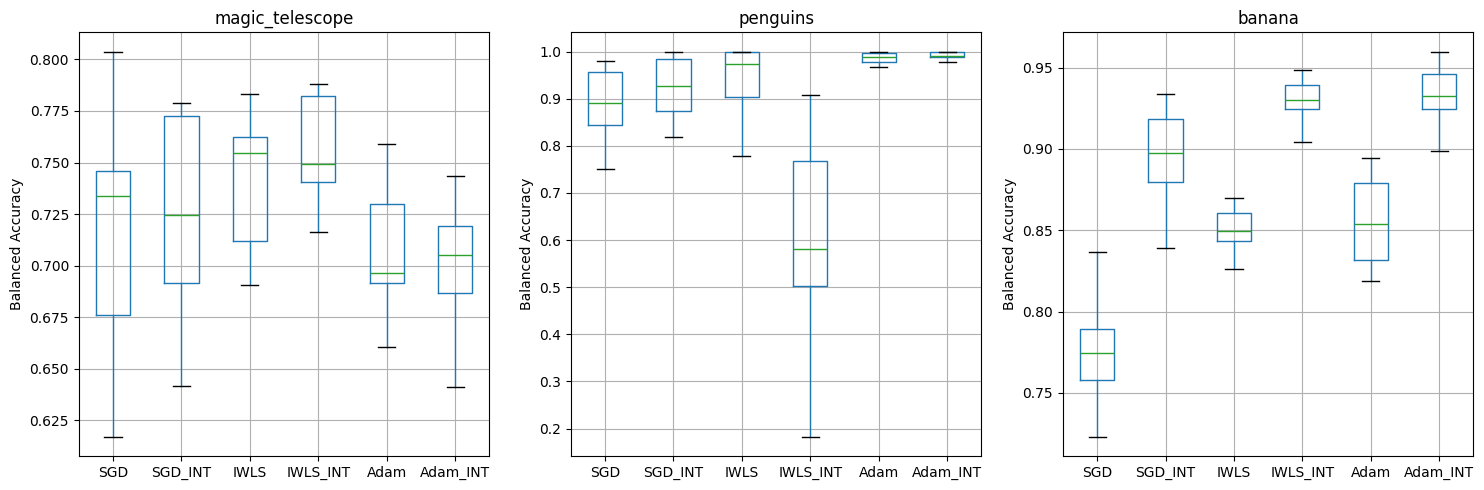

In [31]:
# Plotting side-by-side histograms
fig, axs = plt.subplots(1, len(df_dic), figsize=(15, 5))

for i, (key, df) in enumerate(df_dic.items()):
    ax = axs[i]
    df.boxplot(ax=ax)
    ax.set_title(key)
    ax.set_ylabel('Balanced Accuracy')

plt.tight_layout()
plt.show()

# Compare with other methods

In [32]:
df_dic = {}
optimizers = ['SGD',  'IWLS', 'Adam', 'LDA', 'QDA', 'DecisionTree', 'RandomForest']
sets = ['banana', 'magic_telescope', 'penguins', 'sonar', 'covertype', 'ionosphere', 'breast_cancer', 'airline', 'breast_cancer', 'pcos']
for set_name in sets:
    df_dic[set_name] = pd.DataFrame(columns=optimizers)
    for opt_name in optimizers:
        df_dic[set_name][opt_name] = results[set_name][opt_name]['score']


df_dic['mean'] = pd.DataFrame(columns=optimizers)
for opt_name in optimizers:
        all_scores = []
        for set_name in sets:
            all_scores.extend([np.mean(results[set_name][opt_name]['score'])])

        df_dic['mean'][opt_name] = all_scores


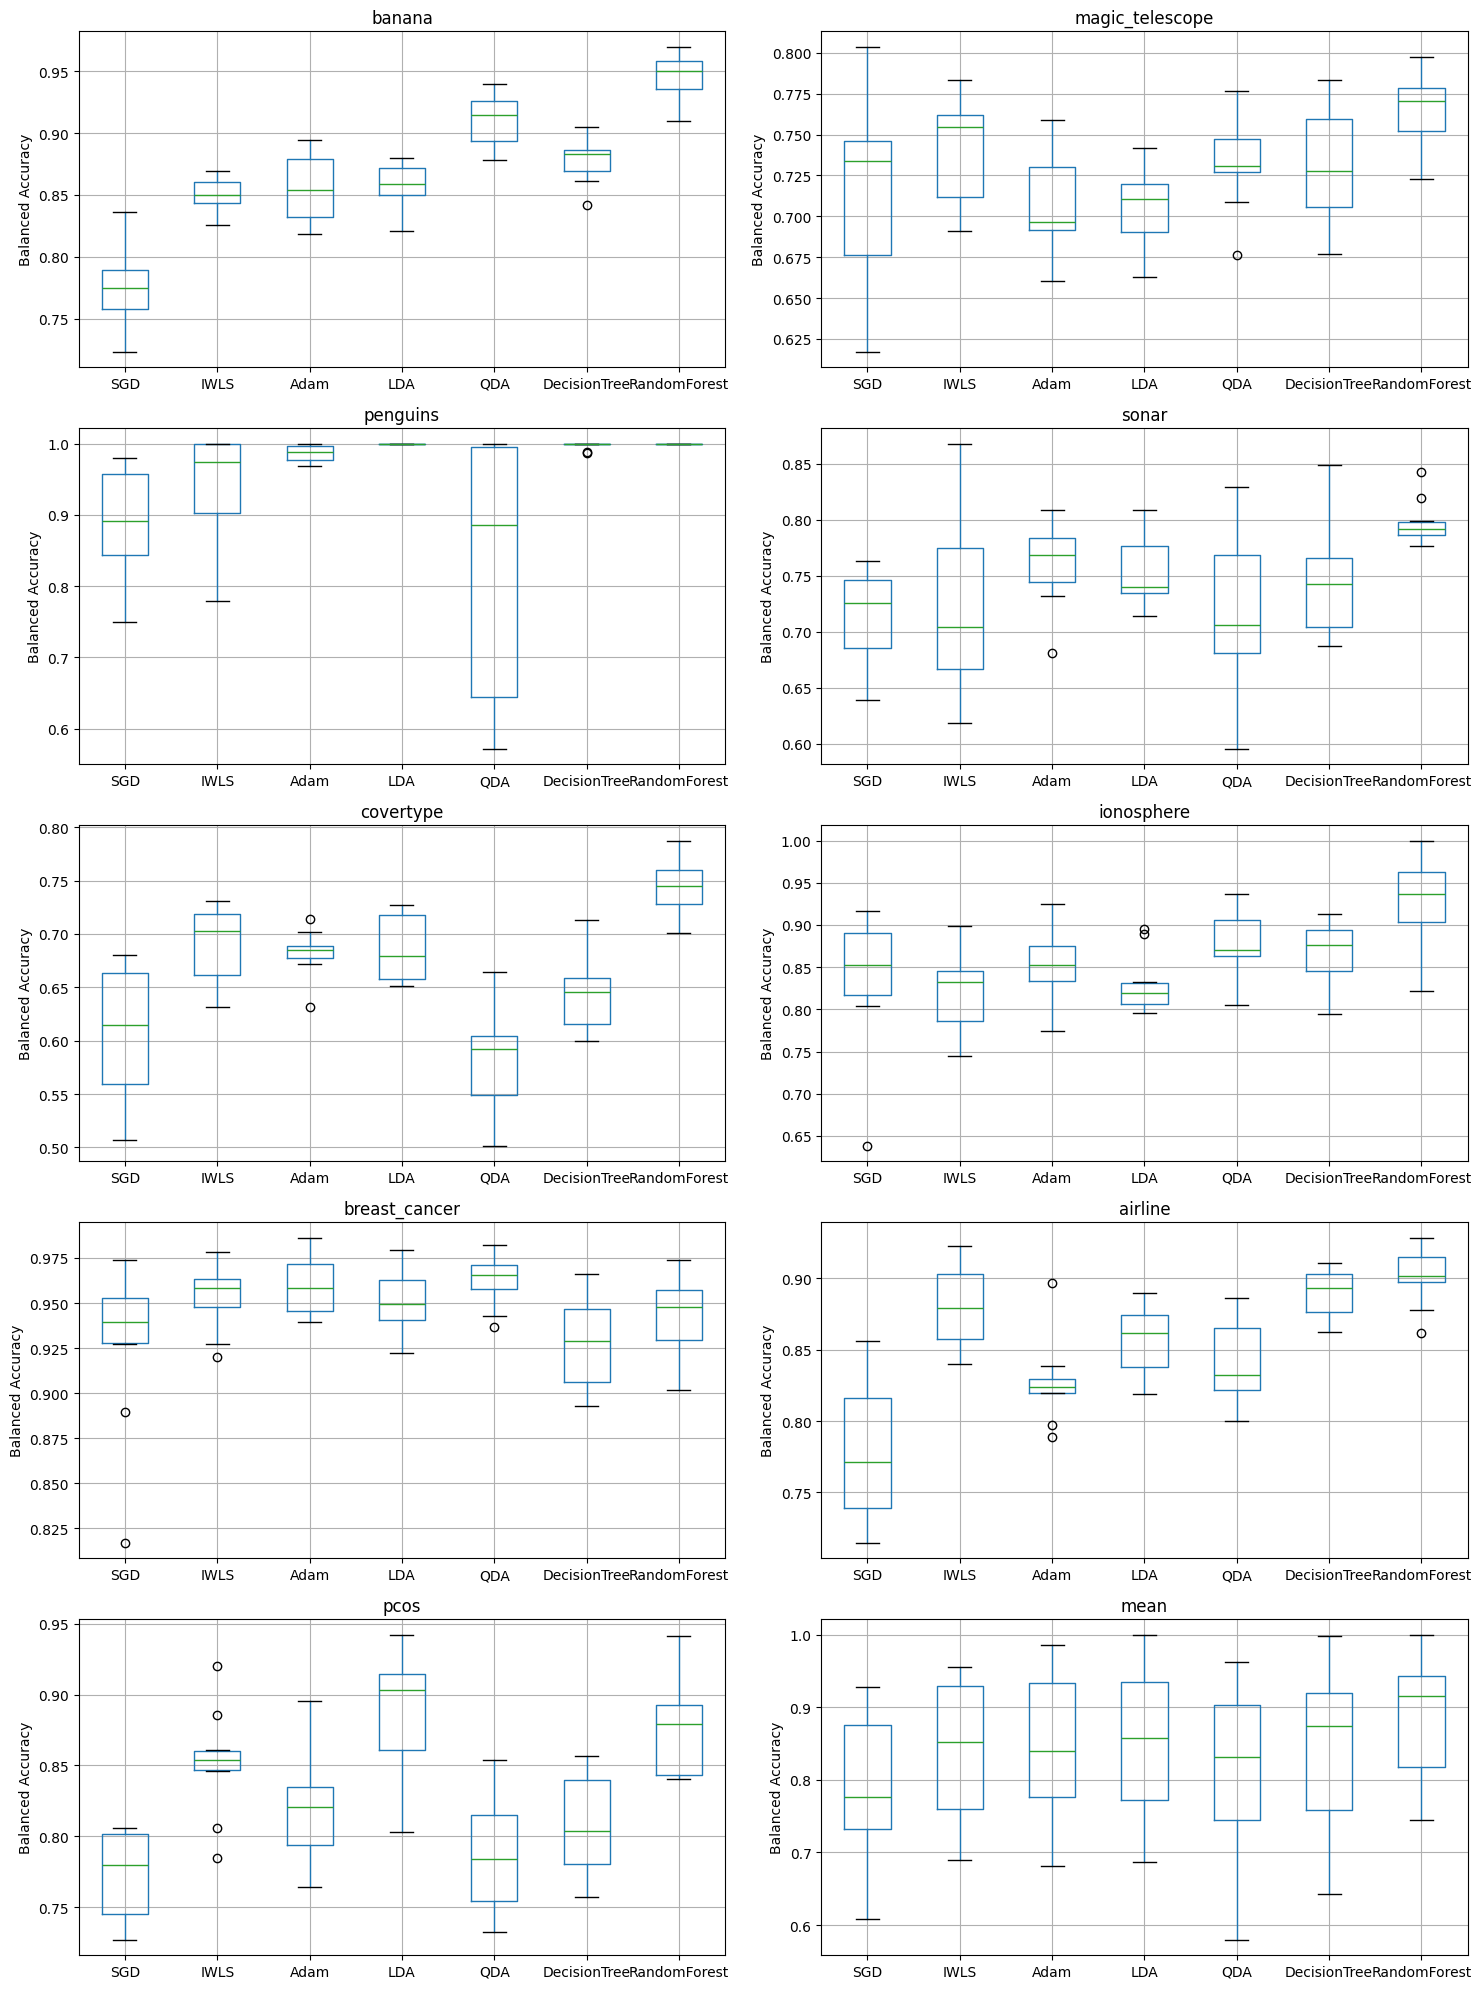

In [33]:
# Plotting the histograms in a 3x3 grid
fig, axs = plt.subplots(5, 2, figsize=(15, 20))

# Flatten the axis array for easy iteration
axs = axs.flatten()

for i, (key, df) in enumerate(df_dic.items()):
    ax = axs[i]
    df.boxplot(ax=ax)
    ax.set_title(key)
    ax.set_ylabel('Balanced Accuracy')

# Hide empty subplots
for i in range(len(df_dic), len(axs)):
    axs[i].axis('off')


plt.tight_layout()
plt.show()